# Tugas 2 Apache Spark 

##### Muhammad Faris Didin Andiyar
##### 5115100118

### Requirement :
1. Java Runtime Environment (JRE) and Java Development Kit (JDK) [installation](https://www.digitalocean.com/community/tutorials/how-to-install-java-with-apt-on-ubuntu-18-04)
2. Apache Spark [installation](https://medium.com/devilsadvocatediwakar/installing-apache-spark-on-ubuntu-8796bfdd0861)
3. Python 2.7 
4. Pyspark 
5. Jupyter [installation](https://www.datacamp.com/community/tutorials/apache-spark-python)
6. numpy
7. pixiedust
8. matplotlib
9. pandas


In [1]:
import findspark
findspark.init("/usr/local/spark")
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Python Spark SQL basic example").getOrCreate()

In [2]:
df2 = spark.read.csv("la/listing-of-active-businesses.csv", header=True, inferSchema=True)

In [3]:
df2.createOrReplaceTempView("business")


### Jumlah Perusahaan dari Spuluh Kota Terbanyak

![alt text](img/case1.png "Jumlah Perusahaan dari Spuluh Kota Terbanyak")

In [4]:
result=spark.sql("SELECT COUNT(`BUSINESS NAME`) as jumlah , CITY from business where year(`LOCATION START DATE`)=2015 GROUP BY CITY order by jumlah desc limit 10") 

In [5]:
result.show()

+------+---------------+
|jumlah|           CITY|
+------+---------------+
| 21734|    LOS ANGELES|
|  1726|NORTH HOLLYWOOD|
|  1623|       VAN NUYS|
|  1241|   SHERMAN OAKS|
|   976| WOODLAND HILLS|
|   961|         ENCINO|
|   657|    STUDIO CITY|
|   613|     NORTHRIDGE|
|   549|         RESEDA|
|   482|  PANORAMA CITY|
+------+---------------+



In [6]:
from pyspark.ml.feature import VectorAssembler

In [7]:
assembler = VectorAssembler(inputCols=["jumlah"], outputCol='features')

In [8]:
result=assembler.transform(result)
result.show()

+------+---------------+---------+
|jumlah|           CITY| features|
+------+---------------+---------+
| 21734|    LOS ANGELES|[21734.0]|
|  1726|NORTH HOLLYWOOD| [1726.0]|
|  1623|       VAN NUYS| [1623.0]|
|  1241|   SHERMAN OAKS| [1241.0]|
|   976| WOODLAND HILLS|  [976.0]|
|   961|         ENCINO|  [961.0]|
|   657|    STUDIO CITY|  [657.0]|
|   613|     NORTHRIDGE|  [613.0]|
|   549|         RESEDA|  [549.0]|
|   482|  PANORAMA CITY|  [482.0]|
+------+---------------+---------+



In [9]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [10]:
kmeans = KMeans().setK(5).setSeed(1)
model = kmeans.fit(result)

In [11]:
prediction = model.transform(result)
prediction.show()

+------+---------------+---------+----------+
|jumlah|           CITY| features|prediction|
+------+---------------+---------+----------+
| 21734|    LOS ANGELES|[21734.0]|         1|
|  1726|NORTH HOLLYWOOD| [1726.0]|         2|
|  1623|       VAN NUYS| [1623.0]|         2|
|  1241|   SHERMAN OAKS| [1241.0]|         4|
|   976| WOODLAND HILLS|  [976.0]|         0|
|   961|         ENCINO|  [961.0]|         0|
|   657|    STUDIO CITY|  [657.0]|         3|
|   613|     NORTHRIDGE|  [613.0]|         3|
|   549|         RESEDA|  [549.0]|         3|
|   482|  PANORAMA CITY|  [482.0]|         3|
+------+---------------+---------+----------+



In [12]:
import pixiedust

Pixiedust database opened successfully



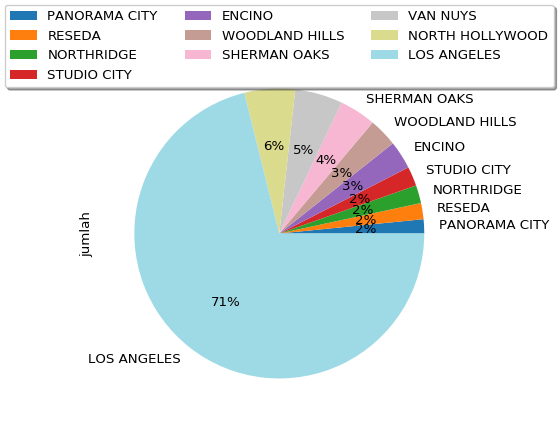

In [24]:
display(prediction)

### Jumlah Perusahaan yang Berdiri pada Sepuluh Tahun terakhir

![alt text](img/case2.png "Jumlah Perushaan 10 Tahun Terakhir")

In [14]:
result2=spark.sql("select count(`LOCATION ACCOUNT #`) as number_company, year(`LOCATION START DATE`) as year_date \
from business group by year_date order by year_date desc limit 10")


In [15]:
result2.show()

+--------------+---------+
|number_company|year_date|
+--------------+---------+
|          1325|     2019|
|         31051|     2018|
|         36677|     2017|
|         37701|     2016|
|         43031|     2015|
|         37458|     2014|
|         31617|     2013|
|         25260|     2012|
|         21490|     2011|
|         19150|     2010|
+--------------+---------+



In [16]:
assembler2 = VectorAssembler(inputCols=["number_company"], outputCol='features')
result2=assembler2.transform(result2)
# result2.show()

In [17]:
kmeans = KMeans().setK(3).setSeed(1)
model2 = kmeans.fit(result2)
prediction2 = model2.transform(result2)
# prediction2.show()


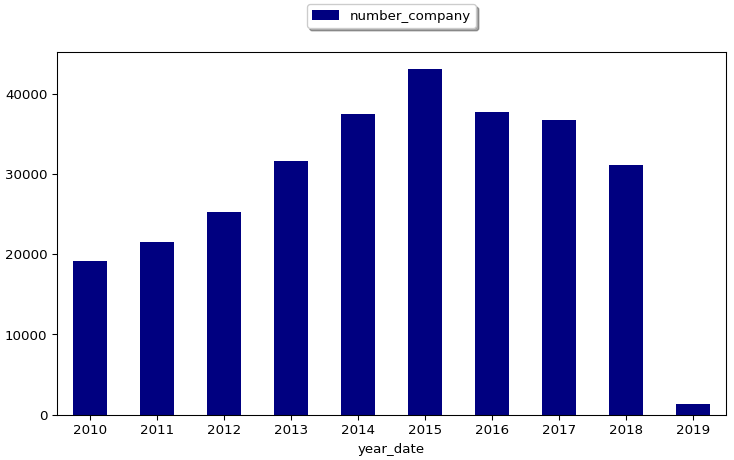

In [27]:
display(prediction2)

### Jumlah Jenis Perusahaan Terbanyak

![alt text](img/case3.png "Jumlah Jenis Perusahaan Terbanyak")

In [36]:
result3=spark.sql("SELECT count(`LOCATION ACCOUNT #`) as number_company, `PRIMARY NAICS DESCRIPTION`\
FROM business where `PRIMARY NAICS DESCRIPTION` IS NOT NULL group by `PRIMARY NAICS DESCRIPTION` order by number_company desc limit 10")

In [37]:
result3.show()

+--------------+-------------------------+
|number_company|PRIMARY NAICS DESCRIPTION|
+--------------+-------------------------+
|         43650|     Lessors of real e...|
|         28561|     All other persona...|
|         24156|     Independent artis...|
|         13838|     Single Family Hou...|
|         13225|     Motion picture & ...|
|         13194|     Management, scien...|
|         13018|     All other profess...|
|         11946|      Janitorial services|
|          8074|           Legal services|
|          7167|     Full-service rest...|
+--------------+-------------------------+



In [38]:
assembler3 = VectorAssembler(inputCols=["number_company"], outputCol='features')
result3=assembler3.transform(result3)

In [39]:
kmeans = KMeans().setK(5).setSeed(1)
model3 = kmeans.fit(result3)
prediction3 = model3.transform(result3)


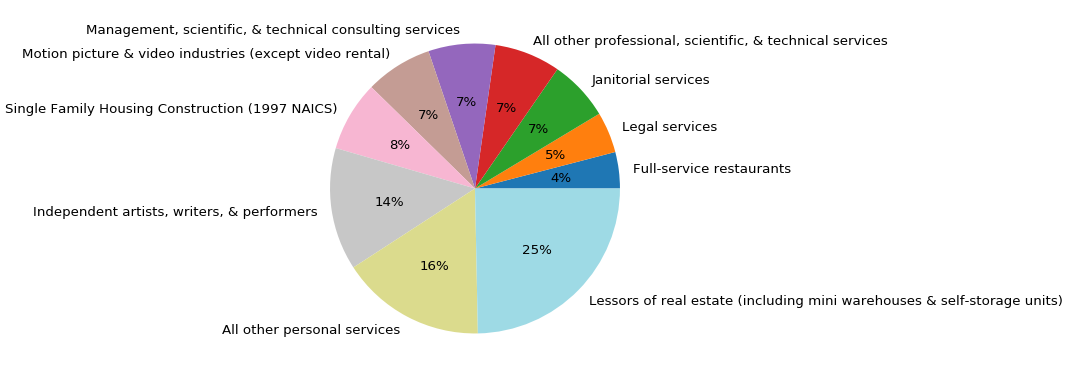

In [40]:
display(prediction3)